In [1]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data.morningstar import Fundamentals as Fundamentals_m
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.research import run_pipeline
from quantopian.research import prices
import alphalens as al
from alphalens.tears import create_returns_tear_sheet
from alphalens.tears import create_information_tear_sheet
from quantopian.pipeline.data import factset
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.data.psychsignal import stocktwits
from quantopian.pipeline.data import Fundamentals
MAX_GROSS_LEVERAGE = 1.0
TOTAL_POSITIONS = 600

In [16]:
def make_pipeline():
    
    #treasury_stock = Fundamentals_m.treasury_stock.latest # Desperate
    #treasury_stock = treasury_stock.winsorize(min_percentile=0.05, max_percentile=0.95)
    
    adjusted_geography_segment_data_mask = Fundamentals_m.adjusted_geography_segment_data.latest # Desperate
    adjusted_geography_segment_data_mask = adjusted_geography_segment_data_mask.winsorize(min_percentile=0.05, max_percentile=0.95)
    
    universe = QTradableStocksUS()
    
    combined_factor = (
        #treasury_stock
        adjusted_geography_segment_data_mask
        
    )

    longs = combined_factor.top(TOTAL_POSITIONS//2, mask=universe)
    shorts = combined_factor.bottom(TOTAL_POSITIONS//2, mask=universe)

    long_short_screen = (longs | shorts)

    # Create pipeline
    pipe = Pipeline(
        columns={
            'longs': longs,
            'shorts': shorts,
            'combined_factor': combined_factor
        },
        screen=long_short_screen
    )
    return pipe

Dropped 10.0% entries from factor data: 10.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


,1D,5D,10D
IC Mean,0.019,0.039,0.047
IC Std.,0.102,0.117,0.128
Risk-Adjusted IC,0.182,0.334,0.369
t-stat(IC),1.776,3.256,3.598
p-value(IC),0.079,0.002,0.001
IC Skew,-0.318,-0.077,-0.158
IC Kurtosis,-0.157,-0.103,-0.711


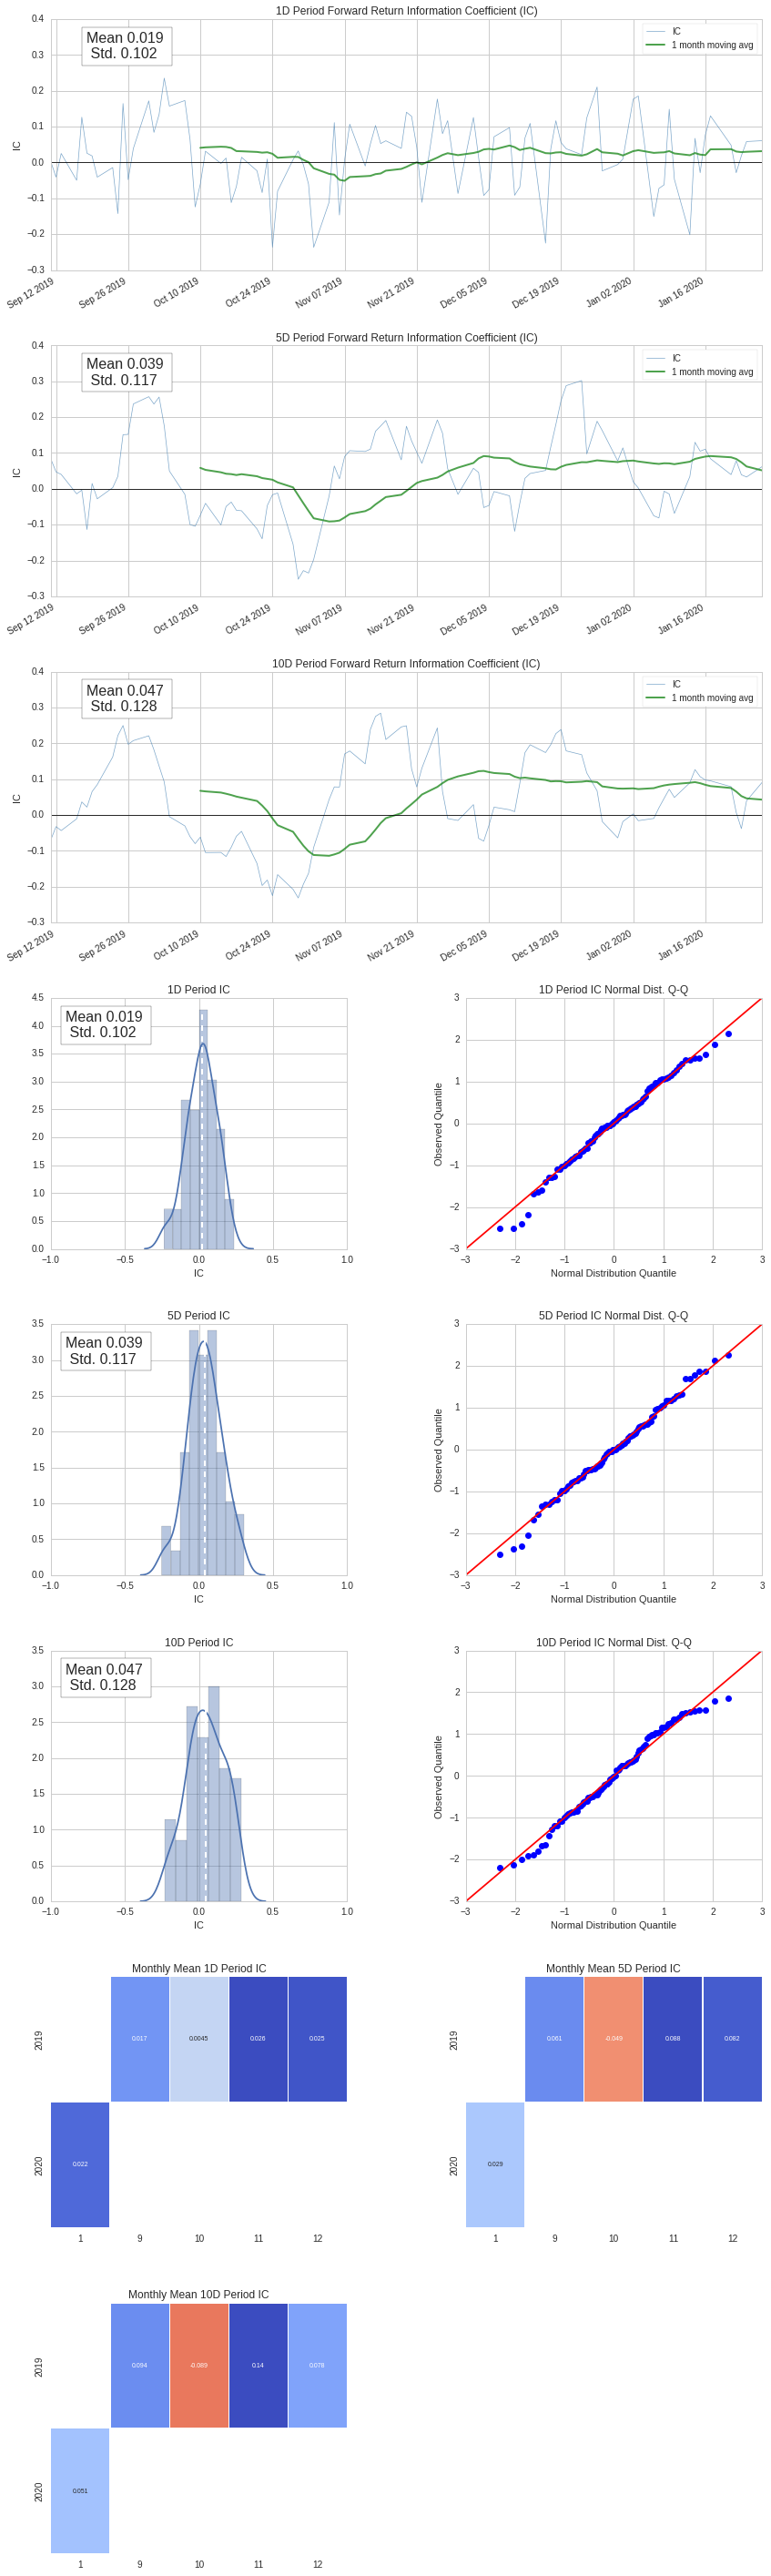

In [14]:
today = "2/11/2020"
six_months_before="9/11/2019"
two_years ="2/11/2018"

pipeline_output = run_pipeline(
    make_pipeline(),
    start_date= six_months_before,
    end_date=today
)

asset_list = pipeline_output.index.levels[1].unique()
asset_prices = prices(
    asset_list,
    start=six_months_before,
    end=today
)
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,10),
)
create_information_tear_sheet(factor_data)

Dropped 2.0% entries from factor data: 2.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Information Analysis


,1D,5D,10D
IC Mean,0.009,0.018,0.023
IC Std.,0.103,0.109,0.112
Risk-Adjusted IC,0.083,0.163,0.201
t-stat(IC),1.835,3.607,4.462
p-value(IC),0.067,0.000,0.000
IC Skew,-0.058,0.040,0.037
IC Kurtosis,-0.358,-0.570,-0.496


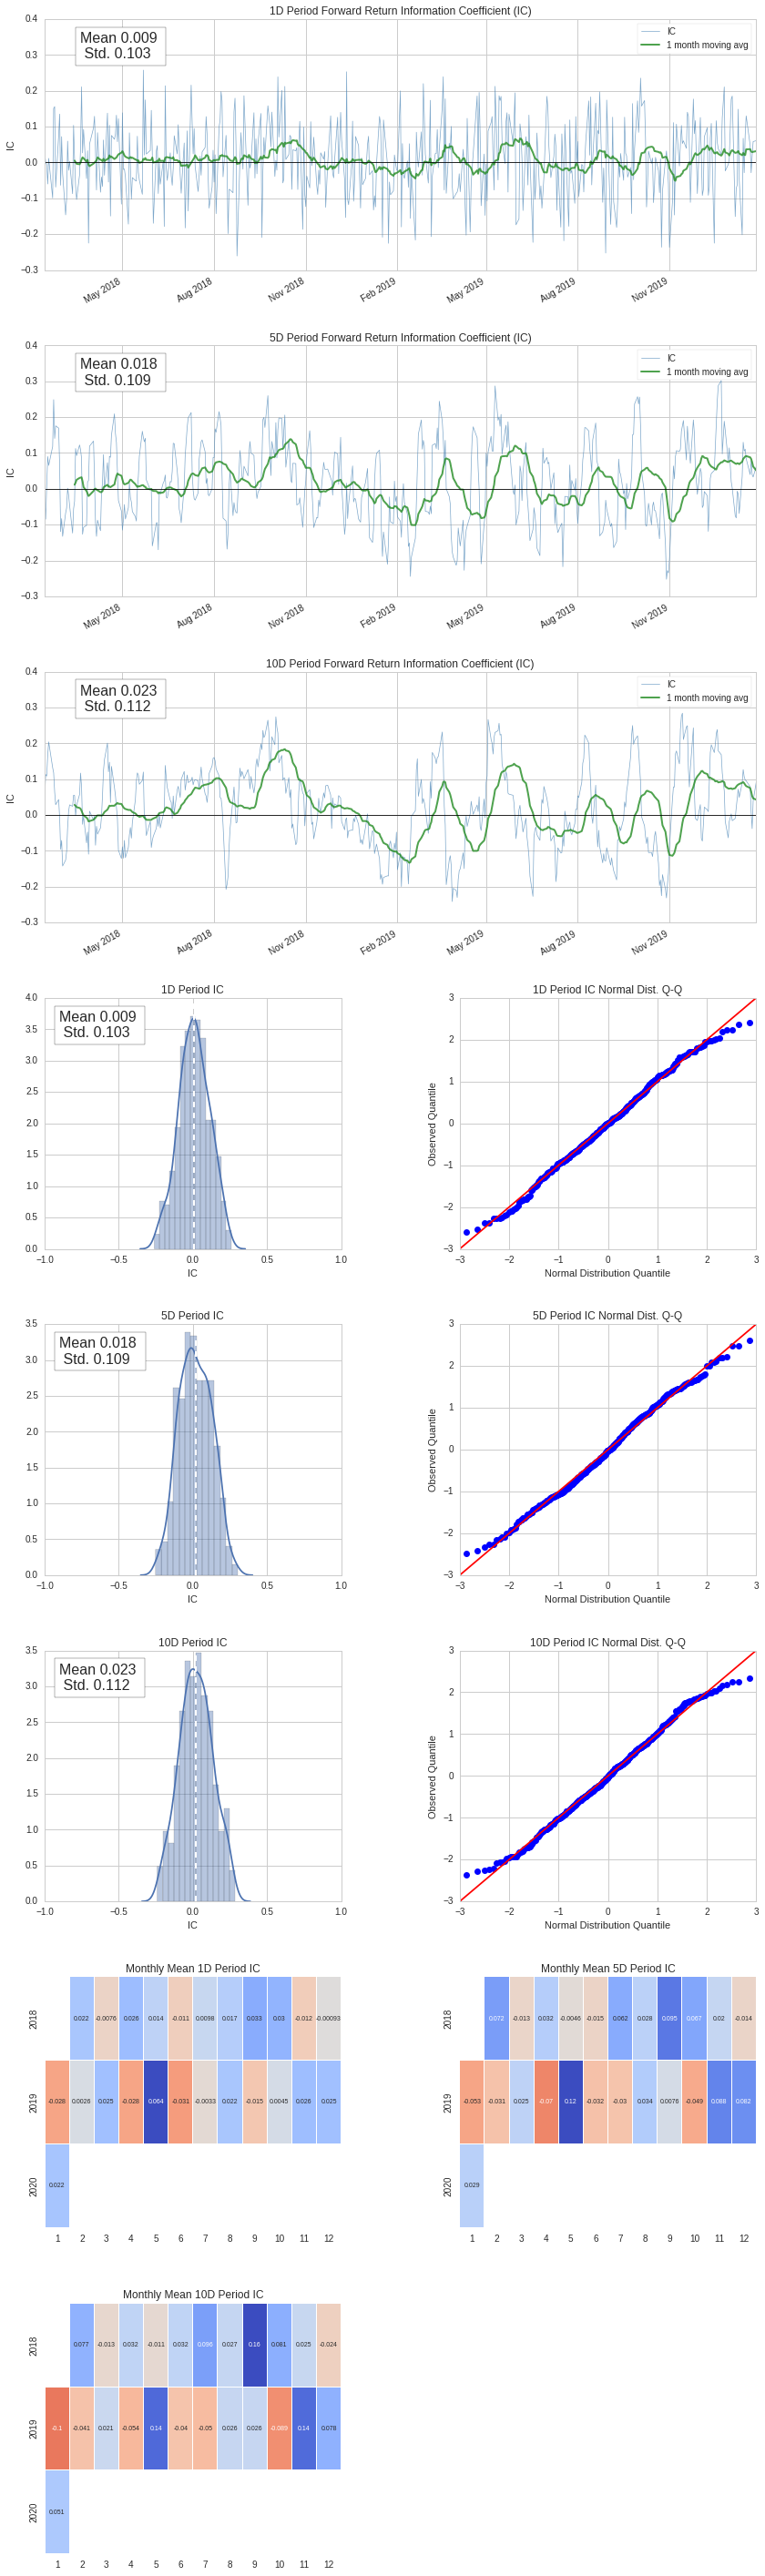

In [15]:
pipeline_output = run_pipeline(
    make_pipeline(),
    start_date= two_years,
    end_date=today
)

asset_list = pipeline_output.index.levels[1].unique()
asset_prices = prices(
    asset_list,
    start=two_years,
    end=today
)
factor_data = al.utils.get_clean_factor_and_forward_returns(
    factor=pipeline_output['combined_factor'],
    prices=asset_prices,
    quantiles=2,
    periods=(1,5,10),
)
create_information_tear_sheet(factor_data)